# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Adaptive Quadrature

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Minimizing cost

The aim of numerical quadrature is to compute

$$\int_a^b f(x) \, \text{d}x$$

where $f$ is a real function of a single variable $x$.

Looked at polynomial quadrature with equally spaced nodes. Can be
inefficient and inaccurate.

Efficiency requires minimizing the number of function evaluations, which
means minimizing the number of nodes. Either

-   Use standard quadrature methods, placing nodes depending on the
    local behaviour of the function $f$, or

-   Use methods that give the best accuracy for a “generic” function
    $f$.

## Adaptive Quadrature

The aim of adaptive quadrature is to compute the integral

$$\int_a^b f(x) \, \text{d}x$$

for arbitrary $f$ to a given tolerance $\epsilon$.

Error depends on derivatives of $f$ and the spacing $h$. Most efficient
to put more nodes (decrease $h$) where the function varies rapidly.

Adaptive quadrature therefore

1.  Computes an approximation with few subintervals;

2.  Estimates the error on each subinterval;

3.  Subdivides subintervals where error is “too large”.

## Example subdivision

An example of the subintervals created by adaptive quadrature.

## Estimating the error

Recursively dividing an interval into two equal subintervals is
straightforward. But how do we choose which intervals need subdividing?
For this we need some error measure.

Use Richardson extrapolation. For any (sub)interval:

1.  Compute $I_{2h}$;

2.  Compute $I_h$;

3.  If $I \simeq I_h + C h^s$ then the *computable estimate of the
    error* is

    $$E_{2 h} \equiv \frac{|I_{2h} - I_h|}{2^s - 1}.$$

## Total vs. local error

Computable error is the *local* error for one subinterval. Aim: To make
the *total* error over the *whole* interval less than $\epsilon$.

Total error bounded by the sum of the errors in each subinterval,

$$|{\cal E}| \leq \sum_{\text{intervals } j} |{\cal E}_j|.$$

Expect ${\cal E}_j$ to be proportional to the width of the subinterval,

$$|{\cal E}_j| \leq D (x_j - x_{j-1}).$$

If we bound the error on each subinterval by

$$|{\cal E}_j| \leq \frac{\epsilon}{b - a} (x_j - x_{j-1})$$

then the resulting total error ${\cal E}$ will be less than our required
tolerance $\epsilon$.

### Example 1

The nodes for adaptive quadrature of a Heaviside function - the accuracy
is $\sim 10^{-9}$ with $\sim 50$ nodes.

### Example 2

The nodes for adaptive quadrature of a more complex function.

# Gaussian Quadrature

Algorithms used so far use nodes $\{x_j\}$ to find a formula of type

$$\int_a^b f(x) \, \text{d}x \simeq \sum_{j=1}^n w_j f_j.$$

Location of the nodes fixed in advance. Choice of
polynomial then fixes *weights* $w_j$. 

In Gaussian Quadrature instead both weights *and* nodes are to be
determined. Use this freedom to evaluate integral “as accurately as
possible”.


We have $2n$ degrees of freedom in the above formula, so can perfectly
represent a polynomial of order $2n-1$. So fix nodes and weights by
ensuring

$$\int_a^b x^s \, \text{d}x = \sum_{j=1}^n w_j x_j^s \quad
        \forall s = 0, 1, \dots, 2 n - 1.$$


If $f$ behaves in known ways (i.e., decays exponentially), can improve
accuracy by introducing a *weight function* $W(x)$:

$$\int_a^b W(x) x^s \, \text{d}x = \sum_{j=1}^n w_j x_j^s
        \quad \forall s = 0, 1, \dots, 2 n - 1.$$

## Example

Gauss-Legendre quadrature on $[-1,1]$, $n=2$ nodes:

$$\int_{-1}^1 x^s \, \text{d}x = \sum_{j=1}^n w_j x_j^s \quad
     s = 0, 1, 2, 3.$$

This gives the four equations

$$\begin{aligned}
  &&s & = 0 : & w_1 + w_2 & = 2 &&\\
  &&s & = 1 : & w_1 x_1 + w_2 x_2 & = 0 &&\\
  &&s & = 2 : & w_1 x_1^2 + w_2 x_2^2 & = 2 / 3 &&\\
  &&s & = 3 : & w_1 x_1^3 + w_2 x_2^3 & = 0.&&
  \end{aligned}$$

The solution is $w_1 = 1 = w_2$, $x_1 = - 1 / \sqrt{3} = -
  x_2$.

Therefore the Gauss-Legendre formula is

$$\int_{-1}^{1} f(x) \, \text{d}x \simeq f(-1 / \sqrt{3}) +  f(1 /
    \sqrt{3}).$$

## Example: 2

If we allow ourself $n=3$ nodes we have to solve

$$\int_{-1}^1 x^s \, \text{d}x = \sum_{j=1}^n w_j x_j^s \quad
     s = 0, 1, 2, 3, 4, 5.$$

This has solution for the weights $w_1 = \tfrac{5}{9} = w_3$, $w_2 =
  \tfrac{8}{9}$ when evaluated at the nodes $x_1 = -
  \sqrt{\tfrac{3}{5}} = - x_3$, $x_2 = 0$.

Therefore the Gauss-Legendre formula is

$$\int_{-1}^{1} f(x) \, \text{d}x \simeq \frac{1}{9} \left( 5
      f(-\sqrt{\tfrac{3}{5}}) + 8 f(0) + 5 f(\sqrt{\tfrac{3}{5}}) \right).$$

In general, nodes are given by zeros of orthogonal polynomials (type
depends on weight function).

## Example: Explicit calculation 1

If we apply the Gauss-Legendre formula with 2 nodes to

$$\int_{-1}^{1} \cos^2 \left(\tfrac{\pi x}{2}\right) \, \text{d}x$$

then we find

$$\int_{-1}^{1} \cos^2 \left(\tfrac{\pi x}{2}\right) \, \text{d}x
    \simeq 0.75938.$$

The Gauss-Legendre formula with 3 nodes gives

$$\int_{-1}^{1} \cos^2 \left(\tfrac{\pi x}{2}\right) \, \text{d}x
    \simeq 1.133565.$$

Compare with the trapezoidal rule ($0$!) and Simpson’s rule ($4/3$) –
the exact answer is $1$ and only two (three) function evaluations are
needed.

## Example: Explicit calculation 1

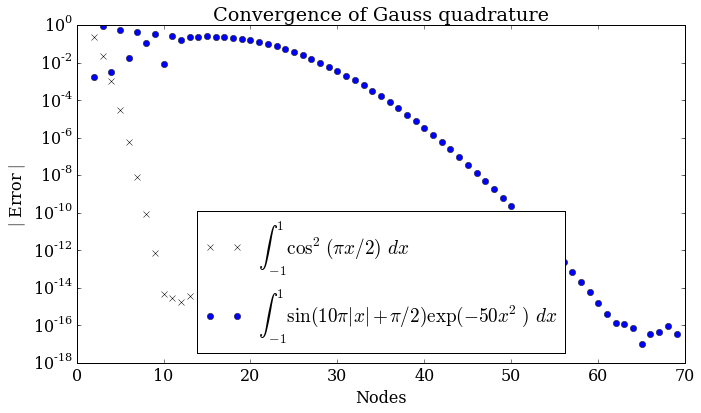

In [3]:
def fn_simple_gq(x):
    """Function used in Gauss quadrature example."""
    
    return (np.cos(np.pi * x / 2.0))**2

def fn_complex_gq(x):
    """Function used in complex Gauss quadrature example."""
    
    return (np.sin(2.0 * np.pi * abs(5.0 * x) + np.pi / 2.0) * np.exp(-2.0 * (5.0 * x)**2))

N = np.array(range(2, 70))
err_simple  = np.zeros_like(N, float)
err_complex = np.zeros_like(N, float)
for i in range(len(N)):
    nodes, weights = np.polynomial.legendre.leggauss(N[i])
    quad_simple = np.dot(weights, fn_simple_gq(nodes))
    quad_complex = np.dot(weights, fn_complex_gq(nodes))
    err_simple [i] = abs(1.0 - quad_simple)
    err_complex[i] = abs(np.sqrt(np.pi / 2.0) * np.exp(-np.pi**2 / 2.0) / 5.0 - quad_complex)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(N[:12], err_simple[:12], 'kx', label = "$\int_{-1}^{1} \cos^2 (\pi x / 2) \, dx$")
ax.semilogy(N, err_complex, 'bo', label = "$\int_{-1}^{1} \sin(10 \pi |x| + \pi / 2) \exp(-50 x^2) \, dx$")
ax.set_xlabel('Nodes')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Gauss quadrature")
ax.legend(loc = "lower center")
fig.tight_layout()
plt.show()

Simple example: very few nodes sufficient for high accuracy. More
complex example: more nodes required, but Gauss quadrature still more
accurate than standard Newton-Cotes methods.